## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.


---

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

---

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

---

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 



In [1]:
import pandas as pd

# Replace 'dataset.csv' with the actual filename if it's different
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
df.shape

(2443651, 9)

In [ ]:
#part 1: Understanding Product Categories
# Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?
#Generate a frequency table for the product category.
#Which are the top 5 most listed product categories?

In [5]:
df.isnull().sum().sort_values(ascending=False)

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?

In [6]:
# Frequency table for 'category'
frequency_table=df["category"].value_counts()
frequency_table_norma=df["category"].value_counts(normalize=True)

In [7]:
frequency_table  # "sports & Outdoors","Beauty","Handmade Clothing, Shoes & Accessories",."Bath & Body","Birthday Gifts"

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [8]:
frequency_table_norma  

category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
                                            ...   
Alexa Built-In Devices                    0.000044
Motorbike Chassis                         0.000044
Plugs                                     0.000044
Smart Home Security & Lighting            0.000043
Smart Speakers                            0.000022
Name: proportion, Length: 296, dtype: float64

In [ ]:
#Visualizations:

#Display the distribution of products across different categories using a bar chart.
#If you face problems understanding the chart, do it for a subset of top categories.
# For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

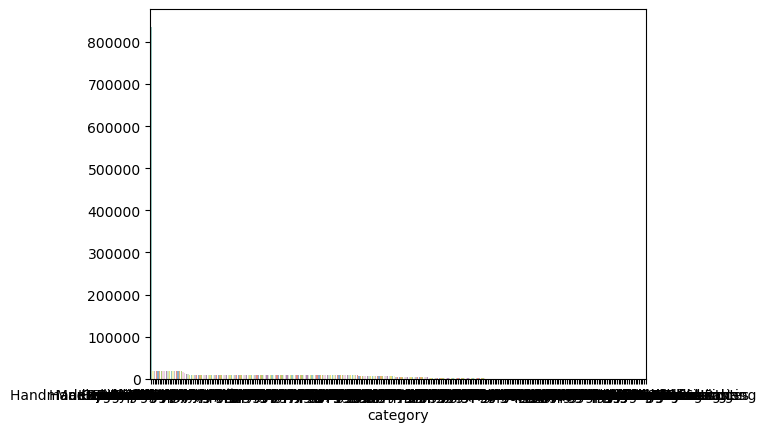

In [10]:
# Plotting a bar chart using the values from the frequency table, with colors sourced from the "Set3" palette
sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3");

C:\Users\enric\AppData\Local\Temp\ipykernel_13472\2314715012.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['0', '100,000', '200,000', '300,000', '400,000', '500,000', '600,000', '700,000', '800,000'])


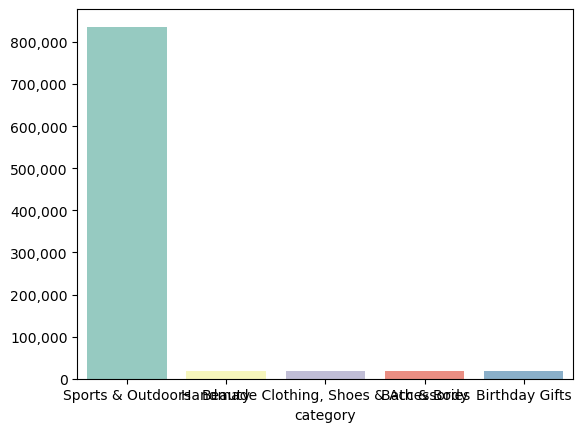

In [11]:

frequency_table = df["category"].value_counts()
values_to_include = ["Sports & Outdoors", "Beauty", "Handmade Clothing, Shoes & Accessories", "Bath & Body", "Birthday Gifts"]

filtered_series = frequency_table[frequency_table.index.isin(values_to_include)]

sns.barplot(x=filtered_series.index, y=filtered_series.values, palette="Set3")
plt.gca().set_yticklabels(['0', '100,000', '200,000', '300,000', '400,000', '500,000', '600,000', '700,000', '800,000'])


plt.show()

In [ ]:
#Part 2: Delving into Product Pricing
# Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

In [ ]:
#Calculate the mean, median, and mode for the price of products.
#What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [12]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

In [13]:
#The average price is 89.24 > 9.99, this means that there are some product_prices that may be outliers causing a
#great discrepancy between the average price and the common prices (it looks like there is is big concentration of observations on lower prices) 
# as per de median and the mode 

In [14]:
#Measures of Dispersion:

#Determine the variance, standard deviation, range, and interquartile range for product price.
# How varied are the product prices? Are there any indicators of a significant spread in prices?

In [15]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(119445.48532256528,
 345.60886175352226,
 0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

In [ ]:
# the minim price is 0, and the max price is 100,000 but we know that 75% prices are below 45.99, this is what explains 
# the value of the sd,  the expected desviation from the mean, of 345.60, but stilwe can say prices are concentrated as per above line



In [24]:
# definimos quantiles 
quantiles = [0,20, 70, 100, float('inf')] 

labels = ['<20', '<70', '<100', '>=100']  # Define the corresponding label

In [27]:
df['price_category'] = pd.cut(df['price'], bins=quantiles, labels=labels, right=False)

In [30]:
df['price_category'] .value_counts()

price_category
<20      1279848
<70       730071
>=100     327688
<100      106044
Name: count, dtype: int64

In [31]:
1279848+730071+327688+106044

2443651

In [ ]:
#Visualizations:

#s there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
#Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing

(0.0, 1500000.0)

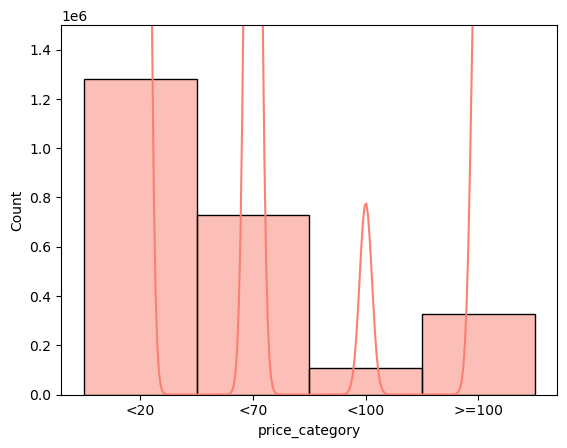

In [50]:
sns.histplot(df['price_category'], kde=True, bins=80, color="salmon")
plt.ylim(0, 1500000) # 

(0.0, 100.0)

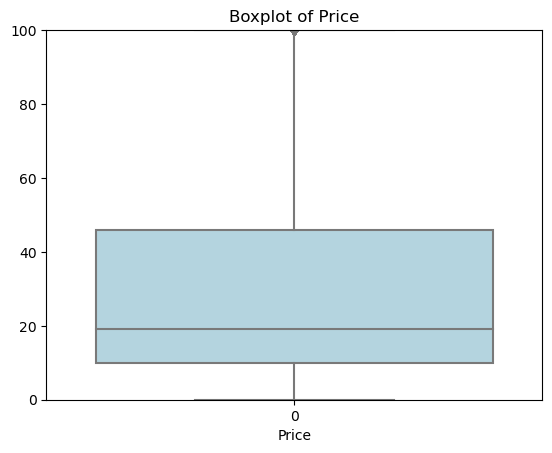

In [48]:
sns.boxplot(data=df['price'], color="lightblue")

# Add labels to the plot
plt.title("Boxplot of Price")
plt.xlabel("Price")
plt.ylabel("")

plt.ylim(0, 100)

#### this is a waste of t

In [39]:
#Part 3.1: Unpacking Product Ratings

#lculate the mean, median, and mode for the rating of products.
#how do customers generally rate products? Is there a common trend?

mean_rating=round(df["stars"].mean(),2)
median_rating = df["stars"].median()
mode_rating =df["stars"].mode()[0]

In [40]:
mean_rating,median_rating,mode_rating

# from the central tendecy measure we can derive that 
# there is a huge quantity of products that do not have a rating which implies that customer didnt evaluate them 
# the median is also 0 which implieas that at elast 50% of the products have a 0 rating
# as a result we can conclude that generally speaking, customer do not give stars to products 

(2.15, 0.0, 0.0)

In [41]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category,price_category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers,<70
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers,<70
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers,<70
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers,<70
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers,<20


In [ ]:
#3.2Measures of Dispersion:

#Determine the variance, standard deviation, and interquartile range for product rating.
A#re the ratings consistent, or is there a wide variation in customer feedback?

In [ ]:
variance_rating=df["stars"].var()
std_dev_rating=round(df["stars"].std(),2)
min_rating=df["stars"].min()
max_rating=df["stars"].max()
range_rating =max_rating -min_rating
quantiles_rating = df["stars"].quantile([0.25,0.5,0.75])

In [ ]:
variance_rating,std_dev_rating,min_rating,max_rating,range_rating,quantiles_rating

In [ ]:
# As expected from the central tendency measures, there is a huge amoint of "0" rating products in our DF,
# frome the quantiles we confirm  what the median told us, 50% of the products have a 0 valueation.
# the SD is almost the same as the mean 2.19 vs 2.15, which basically implies tht most of the pdruducts that have a valuation
# considering what we already know, probably will be valued above 4

In [ ]:
#3.3Calculate the skewness and kurtosis for the rating column.
#Are the ratings normally distributed, or do they lean towards higher or lower values?

In [42]:
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

skewness_rating, kurtosis_rating

(0.08120735761080985, -1.9260061280432985)

the skewness is slighlt positive, which implies that the distribution is right-skewed, this make sense because the mean is >than the median
in our case, we know there is a huge concentration on the left side of the distribution, and the right side will be longer.

In [ ]:
frequency_table=df["stars"].value_counts()
frequency_table_norma=df["stars"].value_counts(normalize=True)

In [ ]:
frequency_table_norma


<Axes: xlabel='stars', ylabel='Count'>

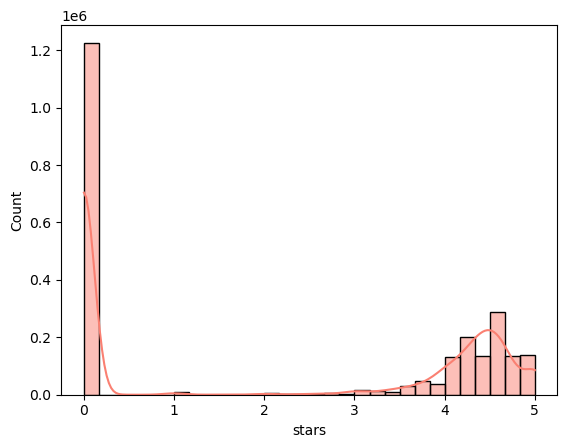

In [43]:
sns.histplot(df['stars'], kde=True, bins=30, color="salmon")